In [66]:
import numpy as np
import astropy
import healpy as hp
import pandas as pd
from desiutil.plots import plot_sky_binned


In [106]:
df = pd.read_csv('../bricks_data/galaxy_catalogue_sample_profiling.csv')

In [107]:
df = df.astype(int)

In [108]:
df['SUM'] = df.sum(axis=1)
df.head(20)

,LRG,ELG,QSO,QSO_RF,SUM
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0


In [110]:
print(df.shape)
df = df[df['SUM'] != 0]
df.shape

(103399, 5)


(5626, 5)

In [137]:
df_test = df[(df['QSO'] !=0) & (df['QSO_RF'] !=0)]
#df_test = df[(df['QSO'] != 0)]

print(df_test.shape)
df_test.head()

(760, 5)


,LRG,ELG,QSO,QSO_RF,SUM
196,0,0,3,3,6
200,0,2,3,3,8
242,0,0,3,3,6
327,0,0,3,3,6
596,0,0,3,3,6


In [111]:
df.head()

,LRG,ELG,QSO,QSO_RF,SUM
10,0,2,0,0,2
15,0,0,3,0,3
31,0,2,0,0,2
48,0,0,3,0,3
49,0,0,0,3,3


In [88]:
df.columns = ['BrickID', 'RA', 'DEC', 'Target_type', 'Fitbits', 'Maskbits']
print(len(df.BrickID.unique()))

991


In [89]:
print(df.shape)
duplicates_removed = df.drop_duplicates()

print(duplicates_removed.shape)

(262379, 6)
(262140, 6)


In [90]:

df = duplicates_removed

# Setting NSIDE values
NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)



Approximate resolution at NSIDE 256 is 0.23 deg


In [91]:
def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))



### Density Estimate for LRG

Number of LRGs in Sample: 39044
4028
Mean LRGs per Pixel: 9.693147964250247


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.00369171  dipole: lon: -162.177, lat: 55.0558, amp: 0.028916
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0

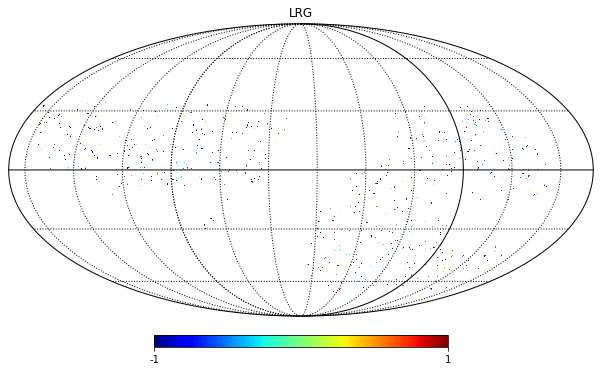

In [92]:
df_LRG = df[df["Target_type"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

m_LRG = np.zeros(NPIX)
LRG_pixel_indices = hp.ang2pix(NSIDE, theta,phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

print(len(unique))
mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block
density_LRG = (counts / mean_LRG) - 1

m_LRG[unique] = density_LRG
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", min=-1, max=1,cmap="jet", notext=False, rot=(100,0,0), badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()



### Density Estimate for ELG


Number of ELG in Sample: 118160
Mean ELG per Pixel: 26.066622545775424


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.0116118  dipole: lon: -164.831, lat: 32.6188, amp: 0.0874503
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0

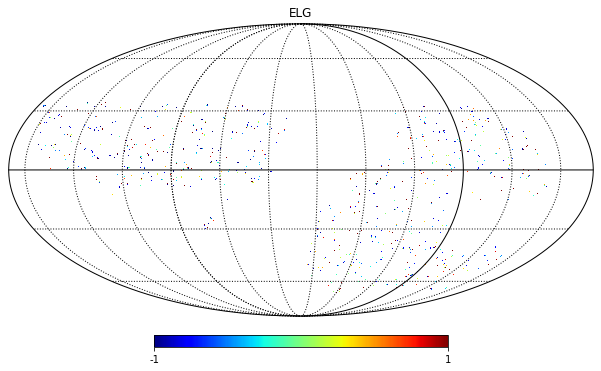

In [93]:

df_ELG = df[df["Target_type"] == 2]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)


print("Number of ELG in Sample:", len(ra_ELG))

m_ELG = np.zeros(NPIX)
ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
# Future: Dont take unique, but also count zero pixels
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

mean_ELG = counts.mean()
print("Mean ELG per Pixel:", mean_ELG)

# Calculating Densities for every block
density_ELG = (counts / mean_ELG) - 1

m_ELG[unique] = density_ELG
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", min=-1, max=1,cmap="jet", notext=False, rot=(100,0,0), badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()




### Density Estimate for QSO


Number of QSO in Sample: 104936
Mean QSO per Pixel: 23.262247838616716


/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: -0.029589  dipole: lon: 45.3091, lat: -72.9128, amp: 0.265872
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.

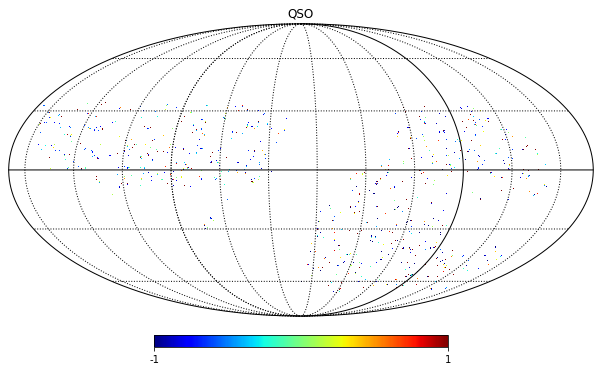

In [94]:

df_QSO = df[df["Target_type"] == 3]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)


print("Number of QSO in Sample:", len(ra_QSO))

m_QSO = np.zeros(NPIX)
QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

mean_QSO = counts.mean()
print("Mean QSO per Pixel:", mean_QSO)

# Calculating Densities for every block
density_QSO = (counts / mean_QSO) - 1

m_QSO[unique] = density_QSO

mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", min=-1, max=1,cmap="jet", notext=False, rot=(100,0,0), badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()


In [ ]:
ax = plot_sky_binned(ra_QSO, dec_QSO, plot_type='healpix', max_bin_area=0.25, verbose=True, cmap='jet')
